In [ ]:
#!pip install CensusData

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import zipfile
import requests
import pickle
#import tensorflow as tf

# US CENSUS DATA SETUP NOTEBOOK

## IMPORT DATA
Import Census ACS data (download from https://www.census.gov/programs-surveys/acs/data/pums.html )

For data exploration, start with a subset - CA 2017



In [172]:
#import the data with getdata.sh
#!getdata.sh   #un-comment this line to do the import
!cat getdata.sh
#list available data:
!ls -l

curl -O https://www2.census.gov/programs-surveys/popest/geographies/2016/state-geocodes-v2016.xls
curl -O https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2017.csv
curl -O https://www2.census.gov/programs-surveys/acs/data/pums/2017/5-Year/csv_pca.zip
curl -O https://www2.census.gov/programs-surveys/acs/data/pums/2017/5-Year/csv_pfl.zip
curl -O https://www2.census.gov/programs-surveys/acs/data/pums/2017/5-Year/csv_ptx.zip
curl -O https://www2.census.gov/programs-surveys/acs/data/pums/2017/5-Year/csv_pdc.zip
curl -O https://www2.census.gov/programs-surveys/acs/data/pums/2017/5-Year/csv_pid.zip
curl -O https://www2.census.gov/programs-surveys/acs/data/pums/2017/5-Year/csv_poh.zip
curl -O https://www2.census.gov/programs-surveys/acs/data/pums/2017/5-Year/csv_ppa.zip
total 1998432
-rw-r--r--  1 davidnordfors  staff     290379 Mar 25 18:24 PUMS_Data_Dictionary_2017.csv
-rw-r--r--  1 davidnordfors  staff         72 Mar 25 13:07 Untitled.ipynb
-rw-r--r

In [97]:
# Read GIPS geocodes for states - run shell command below to import from census.gov
# !curl -O https://www2.census.gov/programs-surveys/popest/geographies/2016/state-geocodes-v2016.xls
fips = pd.read_excel('state-geocodes-v2016.xls')
fips.columns = fips.iloc[4]
fips = fips[5:]

# nst() translates fips-numbers to state-names
def nst(fipsnr):
    return fips[fips['State (FIPS)'].apply(int) == int(fipsnr)]['Name'].values[0]
# stn() translates state-names to fips-numbers 
def stn(statename):
    return fips[fips['Name'] == statename]['State (FIPS)'].values[0]



# Test:
#    nst('05'),nst(5)
# Result:
#    ('Arkansas', 'Arkansas')

In [94]:
fips

4,Region,Division,State (FIPS),Name
5,1,0,00,Northeast Region
6,1,1,00,New England Division
7,1,1,09,Connecticut
8,1,1,23,Maine
9,1,1,25,Massachusetts
10,1,1,33,New Hampshire
11,1,1,44,Rhode Island
12,1,1,50,Vermont
13,1,2,00,Middle Atlantic Division
14,1,2,34,New Jersey


In [6]:
# Read the zipped datafile into a dataframe
# California
with zipfile.ZipFile("csv_pca.zip") as z:
     with z.open("psam_p06.csv") as f:
        df_ca = pd.read_csv(f)
        
# Texas     
with zipfile.ZipFile("csv_ptx.zip") as z:
    with z.open("psam_p48.csv") as f:
        df_tx = pd.read_csv(f)
        
df = pd.concat([df_ca,df_tx])

NameError: name 'df_tx' is not defined

In [8]:
df.head().T[:10]

,0,1,2,3,4
RT,P,P,P,P,P
SERIALNO,2013000000011,2013000000015,2013000000015,2013000000015,2013000000016
DIVISION,9,9,9,9,9
SPORDER,1,1,2,3,1
PUMA,7301,3702,3702,3702,8503
REGION,4,4,4,4,4
ST,6,6,6,6,6
ADJINC,1061971,1061971,1061971,1061971,1061971
PWGTP,8,7,8,9,13
AGEP,21,63,61,34,45


In [9]:
len(df)

1872509

## Data Dictionaries

###  PUMS data dictionary explaining the variables
Source: https://www.census.gov/programs-surveys/acs/data/pums.html )

In [14]:
# Read the data dictionary from the CSV imported by getdata.sh
datadic = pd.read_csv("PUMS_Data_Dictionary_2017.csv").drop_duplicates()
datadic.head()

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
0,VAL,RT,C,1,H,H,Housing Record or Group Quarters Unit
1,VAL,RT,C,1,P,P,Person Record
2,NAME,SERIALNO,C,13,Housing unit/GQ person serial number,NaN,NaN
3,VAL,SERIALNO,C,13,2.02E+12,2.02E+12,Unique identifier
4,NAME,DIVISION,C,1,Division code based on 2010 Census definitions,NaN,NaN


In [15]:
# var_defs : definitions of variables 
var_defs = datadic.groupby('RT').first()
var_defs.head()

,NAME,C,1,Record Type,Unnamed: 5,Unnamed: 6
RT,,,,,,
ACCESS,NAME,C,1,Access to the Internet,b,N/A (GQ/vacant)
ACR,NAME,C,1,Lot size,b,N/A (GQ/not a one-family house or mobile home)
ADJHSG,NAME,C,7,Adjustment factor for housing dollar amounts (...,1000000,2017 factor (1.000000)
ADJINC,NAME,C,7,Adjustment factor for income and earnings doll...,1011189,2017 factor (1.011189)
AGEP,NAME,N,2,Age,0,Under 1 year


#### FUNCTIONS FOR NAVIGATING THE DATA DICTIONARY

- var_RT(label) : gets information about a label 
- var_about(word) : gets information about variables including the word in their descriptions (case insensitive)

In [16]:
# All unique variable names
varnames = datadic['RT'].unique()

def select( df, column , operator , value):
    if operator ==  "equals":
        return df[df[column]==value]
    elif operator == "contains":
        return df[[(value.lower() in str(title).lower()) for title in df[column]]]
    elif operator ==  "gt":
        return df[df[column] > value]
    elif operator ==  "ge":
        return df[df[column] >= value]
    elif operator ==  "lt":
        return df[df[column] <= value]
    elif operator ==  "le":
        return df[df[column] <= value]

In [17]:
# All entries for a variable - definition + values 
def var_name(label):
    return select(datadic,'RT', 'equals',label).drop_duplicates()

# All definitions containing a select string
def var_about(word):
    return pd.concat((select(datadic, 'Record Type', 'contains',word),
                      select(datadic, 'Unnamed: 6', 'contains',word)))


#select definitions
def names(df):
    return df[df['NAME']=='NAME']


#select values
def vals(df):
    return df[df['NAME']=='VAL']

Examples:


In [18]:
#  Information about the variable "DEAR"
var_name('DEAR')

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
1308,NAME,DEAR,C,1,Hearing difficulty,NaN,NaN
1309,VAL,DEAR,C,1,1,1,Yes
1310,VAL,DEAR,C,1,2,2,No


In [19]:
#  Information about the variables with "hear"
var_about('hear')

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
1308,NAME,DEAR,C,1,Hearing difficulty,NaN,NaN
5517,NAME,FDEARP,C,1,Hearing difficulty allocation flag,NaN,NaN


In [20]:
# variables about "difficult"
var_about('difficult')

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
1304,NAME,DDRS,C,1,Self-care difficulty,NaN,NaN
1308,NAME,DEAR,C,1,Hearing difficulty,NaN,NaN
1311,NAME,DEYE,C,1,Vision difficulty,NaN,NaN
1314,NAME,DOUT,C,1,Independent living difficulty,NaN,NaN
1318,NAME,DPHY,C,1,Ambulatory difficulty,NaN,NaN
1334,NAME,DREM,C,1,Cognitive difficulty,NaN,NaN
5514,NAME,FDDRSP,C,1,Self-care difficulty allocation flag,NaN,NaN
5517,NAME,FDEARP,C,1,Hearing difficulty allocation flag,NaN,NaN
5520,NAME,FDEYEP,C,1,Vision difficulty allocation flag,NaN,NaN
5526,NAME,FDOUTP,C,1,Independent living difficulty allocation flag,NaN,NaN


In [21]:
# variables about "disab"
var_about('disab')

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
1322,NAME,DRAT,C,1,Veteran service connected disability rating (p...,NaN,NaN
1330,NAME,DRATX,C,1,Veteran service connected disability rating (c...,NaN,NaN
1369,NAME,HINS3,C,1,"Medicare, for people 65 and older, or people w...",NaN,NaN
1372,NAME,HINS4,C,1,"Medicaid, Medical Assistance, or any kind of g...",NaN,NaN
2303,NAME,DIS,C,1,Disability recode,NaN,NaN
5523,NAME,FDISP,C,1,Disability recode allocation flag,NaN,NaN
5532,NAME,FDRATP,C,1,Disability rating percentage allocation flag,NaN,NaN
5535,NAME,FDRATXP,C,1,Disability rating checkbox allocation flag,NaN,NaN
5575,NAME,FHINS3P,C,1,"Medicare, for people 65 or older, or people wi...",NaN,NaN
5582,NAME,FHINS4P,C,1,"Medicaid, medical assistance, or any kind of g...",NaN,NaN


## EXPLORE CENSUS 

In [22]:
names(var_about('occupat'))

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
3958,NAME,OCCP,C,4,Occupation recode for 2012 and later based on ...,NaN,NaN
4992,NAME,SOCP,C,6,SOC Occupation code for 2012 and later based o...,NaN,NaN
5655,NAME,FOCCP,C,1,Occupation allocation flag,NaN,NaN


In [23]:
var_about('manag').sample(10)

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
5019,VAL,SOCP,C,6,119161,119161,MGR-Emergency Management Directors
3978,VAL,OCCP,C,4,310,310,MGR-Food Service Managers
4996,VAL,SOCP,C,6,112011,112011,MGR-Advertising And Promotions Managers
3965,VAL,OCCP,C,4,100,100,MGR-Administrative Services Managers
5007,VAL,SOCP,C,6,113071,113071,"MGR-Transportation, Storage, And Distribution ..."
2677,VAL,FOD2P,C,4,6211,6211,Hospitality Management
3986,VAL,OCCP,C,4,430,430,"MGR-Miscellaneous Managers, Including Funeral ..."
3874,VAL,NAICSP,C,8,55,55,PRF-Management Of Companies And Enterprises
2356,VAL,FOD1P,C,4,2106,2106,Computer Administration Management And Security
5009,VAL,SOCP,C,6,119021,119021,MGR-Construction Managers


In [24]:
var_about('employ')

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
322,NAME,FES,C,1,Family type and employment status,NaN,NaN
1363,NAME,HINS1,C,1,Insurance through a current or former employer...,NaN,NaN
1576,NAME,NWAB,C,1,Temporary absence from work (UNEDITED - See 'E...,NaN,NaN
1581,NAME,NWAV,C,1,Available for work (UNEDITED - See 'Employment...,NaN,NaN
1588,NAME,NWLA,C,1,On layoff from work (UNEDITED - See 'Employmen...,NaN,NaN
1593,NAME,NWLK,C,1,Looking for work (UNEDITED - See 'Employment S...,NaN,NaN
1598,NAME,NWRE,C,1,Informed of recall (UNEDITED - See 'Employment...,NaN,NaN
1683,NAME,SEMP,N,6,"Self-employment income past 12 months (signed,...",NaN,NaN
2314,NAME,ESP,C,1,Employment status of parents,NaN,NaN
2324,NAME,ESR,C,1,Employment status recode,NaN,NaN


In [25]:
var_about('work')

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
708,NAME,WIF,C,1,Workers in family during the past 12 months,NaN,NaN
714,NAME,WKEXREL,C,2,Work experience of householder and spouse,NaN,NaN
731,NAME,WORKSTAT,C,2,Work status of householder or spouse in family...,NaN,NaN
1293,NAME,COW,C,1,Class of worker,NaN,NaN
1390,NAME,JWMNP,N,3,Travel time to work,NaN,NaN
1405,NAME,JWTR,C,2,Means of transportation to work,NaN,NaN
1576,NAME,NWAB,C,1,Temporary absence from work (UNEDITED - See 'E...,NaN,NaN
1581,NAME,NWAV,C,1,Available for work (UNEDITED - See 'Employment...,NaN,NaN
1588,NAME,NWLA,C,1,On layoff from work (UNEDITED - See 'Employmen...,NaN,NaN
1593,NAME,NWLK,C,1,Looking for work (UNEDITED - See 'Employment S...,NaN,NaN


In [26]:
df[var_selected].head().T.sample(10)

NameError: name 'df' is not defined

In [20]:
var_about('flag')

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
748,NAME,FACCESSP,C,1,Access to the Internet allocation flag,NaN,NaN
752,NAME,FACRP,C,1,Lot size allocation flag,NaN,NaN
756,NAME,FAGSP,C,1,Sales of Agricultural Products allocation flag,NaN,NaN
760,NAME,FBATHP,C,1,Bathtub or shower allocation flag,NaN,NaN
764,NAME,FBDSP,C,1,Number of bedrooms allocation flag,NaN,NaN
768,NAME,FBLDP,C,1,Units in structure allocation flag,NaN,NaN
772,NAME,FBROADBNDP,C,1,Cellular data plan for a smartphone or other m...,NaN,NaN
776,NAME,FCOMPOTHXP,C,1,Other computer equipment allocation flag,NaN,NaN
780,NAME,FCONP,C,1,Condominium fee allocation flag,NaN,NaN
784,NAME,FDIALUPP,C,1,Dial-up service allocation flag,NaN,NaN


## SET POPULATION PARAMETERS / VARIABLES
### SELECT POPULATION WORKING > 20HRS/WEEK AND EARNING > 20K/YR

In [21]:
df_earners = select(df,'WAGP','gt',20000)
df_earners = select(df_earners,'WKHP','gt',20)
df_earners['FTE wage'] = df_earners['WAGP']*40/df_earners['WKHP']
len(df_earners),df_earners['FTE wage'].median()

(1242190, 47659.574468085106)

### SELECT HEARING / VISION DIFFICULTIES

We are looking for people with specified difficulties/disabilities. The census has questions about difficulties with self-care, hearing, vision, independent living, ambulatory and cognitive. We will be looking at people with the following difficulties:

- hearing
- vision

and compare data with coolabilities suggested by research. 

We expect remaining difficulties to be difficult to relate to coolabilities, because they each cover a dearth of diverse conditions. 

In [25]:
var_about('difficult')

,NAME,RT,C,1,Record Type,Unnamed: 5,Unnamed: 6
1304,NAME,DDRS,C,1,Self-care difficulty,NaN,NaN
1308,NAME,DEAR,C,1,Hearing difficulty,NaN,NaN
1311,NAME,DEYE,C,1,Vision difficulty,NaN,NaN
1314,NAME,DOUT,C,1,Independent living difficulty,NaN,NaN
1318,NAME,DPHY,C,1,Ambulatory difficulty,NaN,NaN
1334,NAME,DREM,C,1,Cognitive difficulty,NaN,NaN
5514,NAME,FDDRSP,C,1,Self-care difficulty allocation flag,NaN,NaN
5517,NAME,FDEARP,C,1,Hearing difficulty allocation flag,NaN,NaN
5520,NAME,FDEYEP,C,1,Vision difficulty allocation flag,NaN,NaN
5526,NAME,FDOUTP,C,1,Independent living difficulty allocation flag,NaN,NaN


### IDENTIFY PREFERRED AGE INTERVAL

Vision and hearing tend to worsen with age for all people. By then, most will already have advanced in their careers. We may assume that the age-dependent hearing/vision difficulties come gradually. 

We seek an age interval where

- People have found their careers: after 30.
- age-related loss of vision and hearing has not yet set in: before 40

#### PREFERRED AGE INTERVAL: 30 - 40.
The plots below indicate that the age interval 30-40 fill the requirements. 



In [22]:
# group df_earners by age
df_earners['count']=1
dfeba_all = df_earners.groupby(by='AGEP')
dfeba_dear = select(df_earners,'DEAR','equals',1).groupby(by='AGEP')
dfeba_deye = select(df_earners,'DEYE','equals',1).groupby(by='AGEP')


# Divide variables for people with hearing/seeing difficulties with corresponding values for the whole populations
# By Count - for relating population sizes
dearprop = dfeba_dear.count().join(dfeba_all.count(), lsuffix='_DEAR', rsuffix='_all')
dearprop = dearprop['count_DEAR']/dearprop['count_all']

deyeprop = dfeba_deye.count().join(dfeba_all.count(), lsuffix='_DEYE', rsuffix='_all')
deyeprop = deyeprop['count_DEYE']/deyeprop['count_all']

# By Median - for relating median wages. 
dearpropm = dfeba_dear.median().join(dfeba_all.median(), lsuffix='_DEAR', rsuffix='_all')
dearpropm = dearpropm['FTE wage_DEAR']/dearpropm['FTE wage_all']

deyepropm = dfeba_deye.median().join(dfeba_all.median(), lsuffix='_DEYE', rsuffix='_all')
deyepropm = deyepropm['FTE wage_DEYE']/deyepropm['FTE wage_all']




/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


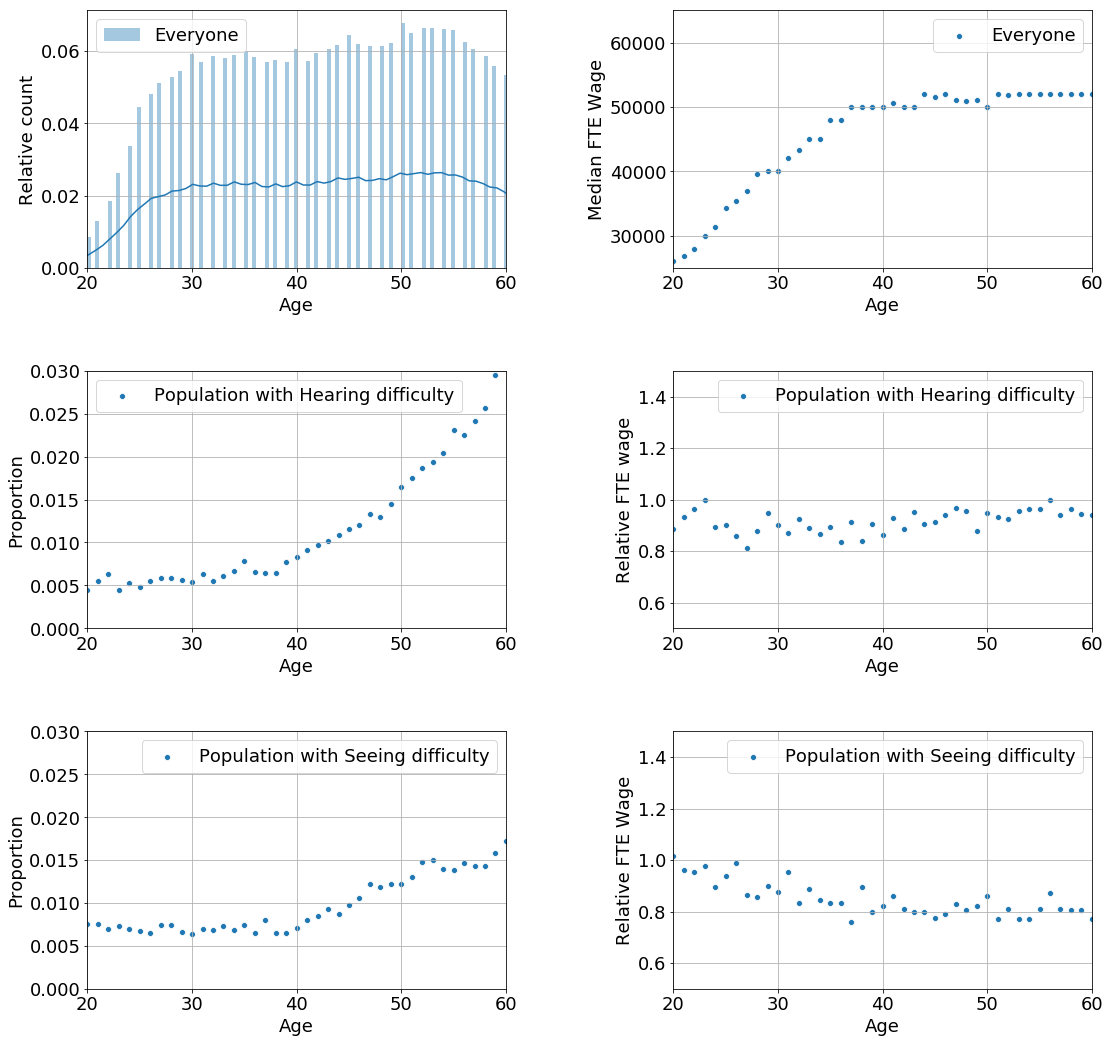

In [23]:
# PLOT PROPORTIONS OF POPULATIONS WITH HEARING/SEEING DIFFICULTIES AND THEIR MEDIAN WAGES BY AGE, IN 
# PROPORTION TO THE GENERAL POPULATION


fig = plt.figure()
plt.rcParams.update({'font.size': 18})
fig.set_size_inches(18, 18)
fig.subplots_adjust(hspace=0.4, wspace=0.4)


# Hearing Difficulties 
ax = fig.add_subplot(3, 2, 3)
sns.scatterplot(x=dearprop.index, y = dearprop, label='Population with Hearing difficulty',ax=ax)
plt.xlim((20,60))
plt.ylim((0,0.03))
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)

ax = fig.add_subplot(3, 2, 4)
sns.scatterplot(x=dearpropm.index, y = dearpropm, label='Population with Hearing difficulty',legend='full',ax=ax)
plt.xlim((20,60))
plt.ylim((0.5,1.5))
plt.xlabel('Age')
plt.ylabel('Relative FTE wage')
plt.grid(True)
plt.legend()



# Seeing Difficulties
ax = fig.add_subplot(3, 2, 5)
sns.scatterplot(x=deyeprop.index, y = deyeprop, label='Population with Seeing difficulty',ax=ax)
plt.xlim((20,60))
plt.ylim((0,0.03))
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)

ax = fig.add_subplot(3, 2, 6)
sns.scatterplot(x=deyepropm.index, y = deyepropm, label='Population with Seeing difficulty',ax=ax)
plt.xlim((20,60))
plt.ylim((0.5,1.5))
plt.xlabel('Age')
plt.ylabel('Relative FTE Wage')
plt.legend()
plt.grid(True)

# All
ax = fig.add_subplot(3, 2, 1)
sns.distplot(df_earners['AGEP'],bins=200,label='Everyone',ax=ax)
plt.xlim((20,60))
plt.xlabel('Age')
plt.ylabel('Relative count')
plt.legend()
plt.grid(True)

ax = fig.add_subplot(3, 2, 2)
sns.scatterplot(x=dfeba_all.median().index,y=dfeba_all.median()['FTE wage'],label='Everyone',ax=ax)
plt.xlim((20,60))
plt.ylim((25000,65000))
plt.xlabel('Age')
plt.ylabel('Median FTE Wage')
plt.legend()
plt.grid(True)
plt.show()

## DATASET SIZE REDUCTION

**TEST CASE: PENNYLVANIA**

In [134]:
# READ data for Pennsylvania     
with zipfile.ZipFile("csv_ppa.zip") as z:
    with z.open("psam_p42.csv") as f:
        dfs = pd.read_csv(f)

In [135]:
len(dfs)

639089

### ASSUME RELEVANT VARIABLES

In [27]:
# var_selected : intuitive selection
var_selected=['AGEP','COW','DDRS','DEAR','DEYE','DIS','DOUT','DPHY','DRAT','DRATX','DREM','FOD1P',
              'FOD2P','HICOV','NWLA','NWLK','NWRE','OCCP','OIP','PAP','PERNP','PINCP','POVPIP',
             'POWSP','REGION','RETP','SCHL','SCIENGRLP','SEMP','SOCP','SSIP','SSP','ST','WAGP','WKHP','WKL',
              'WKW','WRK']

var_defs.loc[var_selected]

,NAME,C,1,Record Type,Unnamed: 5,Unnamed: 6
RT,,,,,,
AGEP,NAME,N,2,Age,0,Under 1 year
COW,NAME,C,1,Class of worker,b,N/A (less than 16 years old/NILF who last work...
DDRS,NAME,C,1,Self-care difficulty,b,N/A (Less than 5 years old)
DEAR,NAME,C,1,Hearing difficulty,1,Yes
DEYE,NAME,C,1,Vision difficulty,1,Yes
DIS,NAME,C,1,Disability recode,1,With a disability
DOUT,NAME,C,1,Independent living difficulty,b,N/A (Less than 15 years old)
DPHY,NAME,C,1,Ambulatory difficulty,b,N/A (Less than 5 years old)
DRAT,NAME,C,1,Veteran service connected disability rating (p...,b,N/A (No service-connected disability/never ser...


### REMOVE NON-SELECTED VARIABLES

In [138]:
dfs = dfs[var_selected]

In [139]:
dfs.head().T

,0,1,2,3,4
AGEP,83,69,68,67,47
COW,NaN,NaN,NaN,NaN,NaN
DDRS,2,2,2,2,1
DEAR,2,2,2,2,2
DEYE,2,2,2,2,2
DIS,2,1,2,2,1
DOUT,2,1,2,2,2
DPHY,2,2,2,2,1
DRAT,NaN,NaN,NaN,NaN,NaN
DRATX,NaN,NaN,2,NaN,NaN



### REMOVE RECORDS WITHOUT OCCUPATION CODES

In [140]:
dfs = dfs.dropna(subset=['OCCP'])

In [141]:
len(dfs)

386175

### REMOVE RECORDS WITH WAGE LESS THAN 20K OR LESS THAN 20 WORK HOURS PER WEEK

Assumption made:
- This serves as definition for a person with a "job"



In [142]:
dfs = select(dfs,'WAGP','gt',20000)
dfs = select(dfs,'WKHP','gt',20)
dfs['FTE wage'] = dfs['WAGP']*40/dfs['WKHP']

In [143]:
len(dfs)

205064

### STORE REDUCED DATASET TO DISK

In [213]:
state = nst(dfs['ST'].iloc[0])
state

'Pennsylvania'

In [218]:
dfs.to_pickle('pums_'+state+'.pkl')

## REPEAT ABOVE: CREATE REDUCED DATASETS FOR ALL STATES: 


In [28]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}


# FIPS-BUNBWERS FOR ALL STATES:
all_state_fips=fips[fips['State (FIPS)'] != '00']['State (FIPS)'].values

### DOWNLOAD ZIPPED DATA FROM US CENSUS FOR ALL STATES

In [5]:
# FUNCTION FOR GENERATING THE CENSUS ZIP-FILENAME FROM FIPS-NUMBER
def state_zipfile(fipsnr):
    return 'csv_p'+us_state_abbrev[nst(fipsnr)].lower()+'.zip'

# state_sipfile(6)
#'csv_pca.zip'

In [323]:
# Download Data from census for ALL states
# QUIRK: MUST RUN THIS CELL TWICE!
#
# STEP1. Create the executable shell for downloading all files.
all_state_zipfiles = ["curl -O https://www2.census.gov/programs-surveys/acs/data/pums/2017/5-Year/"+state_zipfile(fipsnr)+"\n" 
                      for fipsnr in all_state_fips]
txt = "".join(all_state_zipfiles)
f = open("fetch_all_state_zips.sh", "a")
f.write(txt)
!chmod +x fetch_all_state_zips.sh
#
#STEP2. FETCH ALL STATE ZIP FILES: 
#Go to commandline prompt and type: 
#  ./fetch_all_state_zips.sh &


### BUILD FUNCTION FOR CREATION OF REDUCED DATASETS

#### INPUT PARAMETERS

In [29]:
# KEEP ONLY VARIABLES SELECTED ABOVE (HEADS-UP HERE BELOW)
var_defs.loc[var_selected]



,NAME,C,1,Record Type,Unnamed: 5,Unnamed: 6
RT,,,,,,
AGEP,NAME,N,2,Age,0,Under 1 year
COW,NAME,C,1,Class of worker,b,N/A (less than 16 years old/NILF who last work...
DDRS,NAME,C,1,Self-care difficulty,b,N/A (Less than 5 years old)
DEAR,NAME,C,1,Hearing difficulty,1,Yes
DEYE,NAME,C,1,Vision difficulty,1,Yes
DIS,NAME,C,1,Disability recode,1,With a disability
DOUT,NAME,C,1,Independent living difficulty,b,N/A (Less than 15 years old)
DPHY,NAME,C,1,Ambulatory difficulty,b,N/A (Less than 5 years old)
DRAT,NAME,C,1,Veteran service connected disability rating (p...,b,N/A (No service-connected disability/never ser...


#### FUNCTION FOR READING ZIP - REDUCING DATASET - WRITING TO PICKLED FILE ON DISK

In [30]:
# A FUNCTION FOR CREATING A REDUCED DATASET FOR A STATE / FIPS-NUMBER AND SAVE TO DISK AS PICKLED FILE
# QUIRK: FIPS-NUMBER MUST BE ENTERED IN THE FORM OF TWO-CHARACTER STRING, EG "06" 

#FOR NAMING PICKLE: Storage-file-names from fips-number
def state_pklfile(fipsnr):
    state = nst(fipsnr)
    return 'pums_'+state+'.pkl'

# Test:
# state_pklfile(6)
#'pums_California.pkl'


# FUNCTION FOR CREATING REDUCED DATASET AND WRITING TO DISK
def reduced_dataset(fipsnr):
    dfs = pd.DataFrame()
    # READ FULL DATASET FROM ZIP
    with zipfile.ZipFile(state_zipfile(fipsnr)) as z:
        with z.open("psam_p"+fipsnr+".csv") as f:
            dfs = pd.read_csv(f)
    # REMOVE NON-SELECTED VARIABLES
    dfs = dfs[var_selected]
    # REMOVE RECORDS WITHOUT OCCUMPATION CODES
    dfs = dfs.dropna(subset=['OCCP'])
    # REMOVE RECORDS WITH WAGE LESS THAN 20K OR LESS THAN 20 WORK HOURS PER WEEK
    dfs = select(dfs,'WAGP','gt',20000)
    dfs = select(dfs,'WKHP','gt',20)
    dfs['FTE wage'] = dfs['WAGP']*40/dfs['WKHP']
    # SAVE PICKLED FILE TO DISK
    dfs.to_pickle(state_pklfile(fipsnr))    
    
# Test:
#     reduced_dataset(all_state_fips[1])
#     !ls *.pkl
# result:
#     pums_Maine.pkl
#
# read the pickle:
#     dfx = pd.read_pickle('pums_Maine.pkl')
#     dfx['FTE wage'][:3]
# result:
#         0    70000.0
#         1    40000.0
#         7    91000.0
#         Name: FTE wage, dtype: float64

### CREATE REDUCED DATASETS FOR ALL STATES

In [341]:
for fipsnr in all_state_fips:
    reduced_dataset(fipsnr)

!ls *pkl

pums_Alabama.pkl              pums_Montana.pkl
pums_Alaska.pkl               pums_Nebraska.pkl
pums_Arizona.pkl              pums_Nevada.pkl
pums_Arkansas.pkl             pums_New Hampshire.pkl
pums_California.pkl           pums_New Jersey.pkl
pums_Colorado.pkl             pums_New Mexico.pkl
pums_Connecticut.pkl          pums_New York.pkl
pums_Delaware.pkl             pums_North Carolina.pkl
pums_District of Columbia.pkl pums_North Dakota.pkl
pums_Florida.pkl              pums_Ohio.pkl
pums_Georgia.pkl              pums_Oklahoma.pkl
pums_Hawaii.pkl               pums_Oregon.pkl
pums_Idaho.pkl                pums_Pennsylvania.pkl
pums_Illinois.pkl             pums_Rhode Island.pkl
pums_Indiana.pkl              pums_South Carolina.pkl
pums_Iowa.pkl                 pums_South Dakota.pkl
pums_Kansas.pkl               pums_Tennessee.pkl
pums_Kentucky.pkl             pums_Texas.pkl
pums_Louisiana.pkl            pums_Utah.pkl
pums_Maine.pkl                pums_Vermont.pkl
pums_Maryland.pkl  

# PART 2: ANALYZE OCCUPATIONS

## READ DATA

### DEFINE FUNCTION/CLASS dex(fips_nr) 
**LOADS PICKLED DATAFRAME AS A 'DEX' OBJECT**
- Loads the pickled dataframe for a state (identified by FIPS-number)
- ```DEX```Reduces the dataset according to requirements in the dictionary ```required```
- ```DEX.all``` : the whole population
- ```DEX.dear``` : sub-population with hearing difficulties
- ```DEX.deye``` : sub-population with seeing difficulties


In [185]:
socp = var_name('SOCP').iloc[2:].set_index('Record Type')[['Unnamed: 6']]
socp.loc['111021'].values[0]

'MGR-General And Operations Managers'

In [57]:
required = {}
required['columns'] = ['AGEP','DEAR','DEYE','DIS','FOD1P','FOD2P','SOCP','FTE wage']
required['AGEP'] = {'lower_bound':30,'higher_bound':40}

class DEX:
    def __init__(self,df):
        self.all = select(select(df[required['columns']],'AGEP','ge',required['AGEP']['lower_bound']),
                          'AGEP','le',required['AGEP']['higher_bound'])
        self.dear = self.all[self.all['DEAR'] == 1]
        self.deye = self.all[self.all['DEYE'] == 1]
    
def median_wage(df, grpby = 'SOCP'):
        df0 = df.copy()
        df0['counter'] = 1
        mdn =df0.groupby(grpby).median()
        mdn['count'] = df0.groupby(grpby).count()['counter']
        return mdn[['count','AGEP','FTE wage']]


def dex(fipsnr):
    return DEX(pd.read_pickle('pums_'+nst(fipsnr)+'.pkl'))
        

### LOAD DATA FOR ALL STATES, AS DEX-OBJECTS

In [32]:
dx = {}
for fipsnr in all_state_fips:
    dx[fipsnr] = dex(fipsnr)


#### SAMPLE SIZES  

In [52]:
# TOTAL POPULATIONS IN SAMPLES
ndear =[] 
ndeye =[]
nall = []

for fipsnr in all_state_fips:
    ndear += [len(dx[fipsnr].dear)]
    ndeye += [len(dx[fipsnr].deye)]
    nall  += [len(dx[fipsnr].all)]
    
[sum(nall), sum(ndear), sum(ndeye)]


[1191255, 8955, 8434]

In [58]:
median_wage(dx["06"].all).head()

,count,AGEP,FTE wage
SOCP,,,
111021,1374,35.0,60800.000000
1110XX,1160,36.0,93333.333333
112011,102,34.0,77700.000000
112020,1902,35.0,75000.000000
112031,91,35.0,76000.000000


In [254]:
medwage={}
medwage['all'] = {}
medwage['dear'] = {}
medwage['deye'] = {}
for fipsnr in all_state_fips:
    medwage["all"][fipsnr]= median_wage(dx[fipsnr].all)

    medwage["dear"][fipsnr]= median_wage(dx[fipsnr].dear)
    medwage['dear'][fipsnr]['FTE relative'] = medwage['dear'][fipsnr]['FTE wage']/medwage['all'][fipsnr]['FTE wage']
    medwage['dear'][fipsnr]['all count'] = medwage['all'][fipsnr]['count']
    medwage['dear'][fipsnr]['relative count'] = medwage['dear'][fipsnr]['count'] / medwage['dear'][fipsnr]['all count']
    medwage['dear'][fipsnr]['count x FTE relative']= medwage['dear'][fipsnr]['count'] * medwage['dear'][fipsnr]['FTE relative']
    medwage['dear'][fipsnr]['count x FTE wage']= medwage['dear'][fipsnr]['count'] * medwage['dear'][fipsnr]['FTE wage']


    
    medwage["deye"][fipsnr]= median_wage(dx[fipsnr].deye)
    medwage['deye'][fipsnr]['FTE relative'] = medwage['deye'][fipsnr]['FTE wage']/medwage['all'][fipsnr]['FTE wage']
    medwage['deye'][fipsnr]['all count'] = medwage['all'][fipsnr]['count']
    medwage['deye'][fipsnr]['relative count'] = medwage['deye'][fipsnr]['count'] / medwage['deye'][fipsnr]['all count']
    medwage['deye'][fipsnr]['count x FTE relative']= medwage['deye'][fipsnr]['count'] * medwage['deye'][fipsnr]['FTE relative']
    medwage['deye'][fipsnr]['count x FTE wage']= medwage['deye'][fipsnr]['count'] * medwage['deye'][fipsnr]['FTE wage']



def mdear(fipsnr):
    return medwage['dear'][fipsnr][['all count','count','count x FTE wage','count x FTE relative']].reset_index()
def mdeye(fipsnr):
    return medwage['deye'][fipsnr][['all count','count','count x FTE wage','count x FTE relative']].reset_index()


In [305]:
us_mdear = pd.concat([mdear(fipsnr) for fipsnr in all_state_fips],axis=0).groupby('SOCP').sum().reset_index()
us_mdear['FTE relative'] = (us_mdear['count x FTE relative'] / us_mdear['count']).round(2)
us_mdear['dear-FTE USmean']  = (us_mdear['count x FTE wage'] / us_mdear['count']).round()
us_mdear['Occupation'] = us_mdear['SOCP'].apply(lambda x:  socp.loc[x][0])
us_mdear= us_mdear[['SOCP','Occupation','FTE relative','dear-FTE USmean','count','all count']]


us_mdeye = pd.concat([mdeye(fipsnr) for fipsnr in all_state_fips],axis=0).groupby('SOCP').sum().reset_index()
us_mdeye['FTE relative'] = (us_mdeye['count x FTE relative'] / us_mdeye['count']).round(2)
us_mdeye['deye-FTE USmean']  = (us_mdeye['count x FTE wage'] / us_mdeye['count']).round()
us_mdeye['Occupation'] = us_mdeye['SOCP'].apply(lambda x:  socp.loc[x][0])
us_mdeye= us_mdeye[['SOCP','Occupation','FTE relative','deye-FTE USmean','count','all count']]



In [327]:
us_mdear.sort_values(['FTE relative'],ascending=False)

,SOCP,Occupation,FTE relative,dear-FTE USmean,count,all count
380,516031,PRD-Sewing Machine Operators,4.47,117150.0,4,107
316,474031,CON-Fence Erectors,3.91,107429.0,1,4
186,339091,PRT-Crossing Guards,3.08,135000.0,1,9
72,1720XX,ENG-Biomedical And Agricultural Engineers,2.71,205528.0,4,49
217,395011,PRS-Barbers,2.27,89600.0,1,11
225,399041,PRS-Residential Advisors,2.21,59943.0,5,10
329,492092,"RPR-Electric Motor, Power Tool, And Related Re...",1.94,53073.0,7,59
268,434181,OFF-Reservation And Transportation Ticket Agen...,1.92,66677.0,8,188
291,451011,"FFF-First-Line Supervisors Of Farming, Fishing...",1.88,71244.0,2,20
40,132021,FIN-Appraisers And Assessors Of Real Estate,1.77,92019.0,6,132


In [310]:
us_mdeye.sort_values(['deye-FTE USmean','FTE relative'],ascending=False)

,SOCP,Occupation,FTE relative,deye-FTE USmean,count,all count
74,1720XX,ENG-Biomedical And Agricultural Engineers,4.31,343778.0,2,56
253,434041,"OFF-Credit Authorizers, Checkers, And Clerks",4.45,287955.0,4,54
134,2740XX,ENT-Broadcast And Sound Engineering Technician...,3.38,190184.0,5,407
238,419041,SAL-Telemarketers,3.58,163820.0,4,50
63,152011,CMM-Actuaries,1.21,150000.0,1,24
136,291020,MED-Dentists,1.04,145263.0,11,695
17,119041,MGR-Architectural And Engineering Managers,1.36,140952.0,6,664
140,291060,MED-Physicians And Surgeons,1.11,131005.0,44,8544
88,192099,"SCI-Physical Scientists, All Other",2.22,128878.0,10,1959
174,331012,PRT-First-Line Supervisors Of Police And Detec...,2.14,120670.0,7,277


In [326]:
deartops = us_mdear.sort_values(['dear-FTE USmean','FTE relative'],ascending=False)
deartops.to_pickle('deartops.pkl')

deyetops = us_mdeye.sort_values(['deye-FTE USmean','FTE relative'],ascending=False)
deyetops.to_pickle('deyetops.pkl')